# Why take a sample from a distribution?

To explore statistics

If two samples are taken from the same distribution, a t-test on those samples should have a large p-value

If two samples are taken from a different distribution, a t-test on those samples should have a small p-value

Repeating this sampling and analysing the resulting p-values can indicate whether a sample size is large enough

## Testing it out with data

In [60]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm, stats

In [43]:
# read in csv data from ONS
df = pd.read_csv(r'C:\Users\mike_\dev\DataScienceMathsWithPython\Statistics\000-Data sources\ONS_Regional.csv', skiprows=2, encoding= 'unicode_escape')

In [44]:
# check out average life satisfaction rating
df_sats = df[df['Indicator'] == 'Average life satisfaction rating']

In [45]:
df_sats

,AREACD,AREANM,Tier,Indicator,Category,Period,Measure,Unit,Value
4342,E06000001,Hartlepool,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.33
4343,E06000002,Middlesbrough,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.21
4344,E06000003,Redcar and Cleveland,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.44
4345,E06000004,Stockton-on-Tees,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.40
4346,E06000005,Darlington,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.25
...,...,...,...,...,...,...,...,...,...
4719,W06000020,Torfaen,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.34
4720,W06000021,Monmouthshire,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.59
4721,W06000022,Newport,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.28
4722,W06000023,Powys,District/Unitary,Average life satisfaction rating,Spreading opportunity and improving public ser...,04/2020 - 03/2021,Rating,NaN,7.42


In [46]:
# drop nan
df_sats = df_sats.dropna(subset=['Value'])

In [182]:
# create list of values for satisfaction
sats_list = df_sats[['Value']].values.tolist()

In [197]:
# flatten out list of lists
sats_list = [x for l in sats_list for x in l]

In [198]:
sats_list[0:10]

[7.33, 7.21, 7.44, 7.4, 7.25, 7.29, 7.21, 7.43, 7.16, 7.14]

[7.28, 7.19, 7.88, 7.41, 7.32]
[7.15, 7.03, 7.34, 7.57, 7.03]


Ttest_indResult(statistic=1.2046677189358983, pvalue=0.26275756782902154)

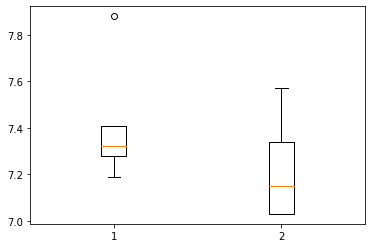

In [420]:
# take samples from the SAME dataset
n = 5
sample_1 = []
sample_2 = []
for n in range(n):
    random_int = random.randint(0,len(sats_list)-1)
    while random_int in sample_1:
        random_int = random.randint(0,len(sats_list)-1)
    sample_1.append(sats_list[random_int])
    random_int = random.randint(0,len(sats_list)-1)
    while random_int in sample_2:
        random_int = random.randint(0,len(sats_list)-1)
    sample_2.append(sats_list[random_int])
    
print(sample_1[0:10])
print(sample_2[0:10])

# carry out t-test
res = stats.ttest_ind(sample_1, sample_2, 
                      equal_var=True)

display(res)

data = [sample_1, sample_2]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

p-values are almost always large here, even from a small sample size

a p-value of 0.05 is often considered the threshold for a significant difference between two samples

In [433]:
# split main sample into two (deliberately different)

sats_list.sort()

In [435]:
len(sats_list)

377

In [440]:
# create high list and low list split
sats_list_low = sats_list[:len(sats_list)//2]

In [448]:
sats_list_high = sats_list[len(sats_list_low):]

In [449]:
len(sats_list_low) + len(sats_list_high)

377

[7.31, 7.28, 7.38, 7.4, 7.15]
[7.58, 7.58, 7.44, 7.74, 7.72]


Ttest_indResult(statistic=-4.3777213758352165, pvalue=0.0026018256833120795)

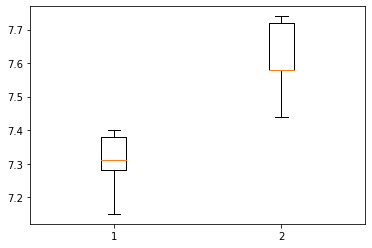

In [467]:
# take samples from the DIFFERENT datasets
n = 5
sample_low = []
sample_high = []
for n in range(n):
    random_int = random.randint(0,len(sats_list_low)-1)
    while random_int in sample_low:
        random_int = random.randint(0,len(sats_list_low)-1)
    sample_low.append(sats_list_low[random_int])
    random_int = random.randint(0,len(sats_list_high)-1)
    while random_int in sample_high:
        random_int = random.randint(0,len(sats_list_high)-1)
    sample_high.append(sats_list_high[random_int])
    
print(sample_low[0:10])
print(sample_high[0:10])

# carry out t-test
res = stats.ttest_ind(sample_low, sample_high, 
                      equal_var=False)

display(res)

data = [sample_low, sample_high]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

in this case the p-values are very low, even with super low sample sizes because the populations from which the samples are drawn are very different